# Experiments on two photon dataset
- This python notebook contains the code to repeat all results on two photon dataset in [1].
- The data is made publically available by Allen Institue of Brain Scienence and can be found at here.
- This ReadMe file has been generated by running 'Experiments_Two_Photon.ipynb' file


### Step 0: Import all modules
- The below given segment of code will import all packaged needed for this demp


In [1]:
import allensdk.brain_observatory.stimulus_info as stim_info

from allen_api import download_allen_insitute_data, prepare_allen_insitute_data
from classification_api import classifiers, run_supervised_classification, run_subset_supervised_classification, plot_confusion_mat
from analysis_api import plot_reponse_correlation, plot_tSNE

import seaborn as sns
import pandas as pd


from tqdm.notebook import tqdm
from ipywidgets import IntProgress



cre_lines=['Emx1-IRES-Cre','Nr5a1-Cre'];
stimuli_set=[stim_info.NATURAL_MOVIE_ONE, stim_info.NATURAL_MOVIE_TWO,
             stim_info.NATURAL_MOVIE_THREE, stim_info.SPONTANEOUS_ACTIVITY]

### Step 1: Download dataset using allenSDK
- This dataset has individual neuronal responses recorded from mice of different transgenic Cre-lines.
- For the initial analaysis, we use two Cre Lines data.
- For each Cre-Line we use the neuronal responses to Natural Movies 1, 2, 3 and Resting State responses.
- The below given code downloads the corresponding data from [http://observatory.brain-map.org/visualcoding](http://observatory.brain-map.org/visualcoding "Dataset Link")

In [2]:
for cre_line in tqdm(cre_lines):
    for stimuli in stimuli_set:
        # downloads experiment data from allen inistute respository
        download_allen_insitute_data(cre_line, stimuli, 5)
        # extracts the responses to stimuli of intrest and saves them in a mat file for further processing
        prepare_allen_insitute_data(cre_line, stimuli)
        


100%|██████████| 41/41 [00:02<00:00, 13.85it/s]


saved data for Cre Line: Emx1-IRES-Cre and stimuli: natural_movie_one in dataset/processed/Emx1-IRES-Cre/natural_movie_one/three_session_A/data.mat



100%|██████████| 36/36 [00:00<00:00, 226.17it/s]


saved data for Cre Line: Emx1-IRES-Cre and stimuli: natural_movie_two in dataset/processed/Emx1-IRES-Cre/natural_movie_two/three_session_C2/data.mat



100%|██████████| 41/41 [00:00<00:00, 252.75it/s]


saved data for Cre Line: Emx1-IRES-Cre and stimuli: natural_movie_three in dataset/processed/Emx1-IRES-Cre/natural_movie_three/three_session_A/data.mat



100%|██████████| 36/36 [00:00<00:00, 304.09it/s]


saved data for Cre Line: Emx1-IRES-Cre and stimuli: spontaneous in dataset/processed/Emx1-IRES-Cre/spontaneous/three_session_C2/data.mat



100%|██████████| 39/39 [00:00<00:00, 338.95it/s]


saved data for Cre Line: Nr5a1-Cre and stimuli: natural_movie_one in dataset/processed/Nr5a1-Cre/natural_movie_one/three_session_A/data.mat



100%|██████████| 35/35 [00:00<00:00, 313.66it/s]


saved data for Cre Line: Nr5a1-Cre and stimuli: natural_movie_two in dataset/processed/Nr5a1-Cre/natural_movie_two/three_session_C2/data.mat



100%|██████████| 39/39 [00:00<00:00, 361.29it/s]


saved data for Cre Line: Nr5a1-Cre and stimuli: natural_movie_three in dataset/processed/Nr5a1-Cre/natural_movie_three/three_session_A/data.mat



100%|██████████| 35/35 [00:00<00:00, 281.94it/s]


saved data for Cre Line: Nr5a1-Cre and stimuli: spontaneous in dataset/processed/Nr5a1-Cre/spontaneous/three_session_C2/data.mat




### Step 2: Train and test the neuronal responses using supervised classifier (Table 4)¶
- Four different types of classifier have been implemented
- Step 1. Needs to be completed before running this step.
- Results are avaraged across 5 different random initialization
- These results are given in Table 4 of the paper. The result may slightly vary due to random initialization.


In [3]:
for cre_line in tqdm(cre_lines):
    for stimuli in stimuli_set:
        acc = run_supervised_classification(cre_line, stimuli, classifiers.GMM)
        print('Accuracy of Classifying '+cre_line+'('+stimuli+') data'+
              ': '+str(round(acc,2))+'  ')

Accuracy of Classifying Emx1-IRES-Cre(natural_movie_one) data: 53.39  
Accuracy of Classifying Emx1-IRES-Cre(natural_movie_two) data: 51.84  
Accuracy of Classifying Emx1-IRES-Cre(natural_movie_three) data: 71.51  
Accuracy of Classifying Emx1-IRES-Cre(spontaneous) data: 54.15  
Accuracy of Classifying Nr5a1-Cre(natural_movie_one) data: 54.78  
Accuracy of Classifying Nr5a1-Cre(natural_movie_two) data: 56.83  
Accuracy of Classifying Nr5a1-Cre(natural_movie_three) data: 62.21  
Accuracy of Classifying Nr5a1-Cre(spontaneous) data: 47.83  



### Step 3: Plot confusion matrix from supervised classifier result (Fig 4)¶
- Plot results obtained from Step 2 as a confusion matrix 


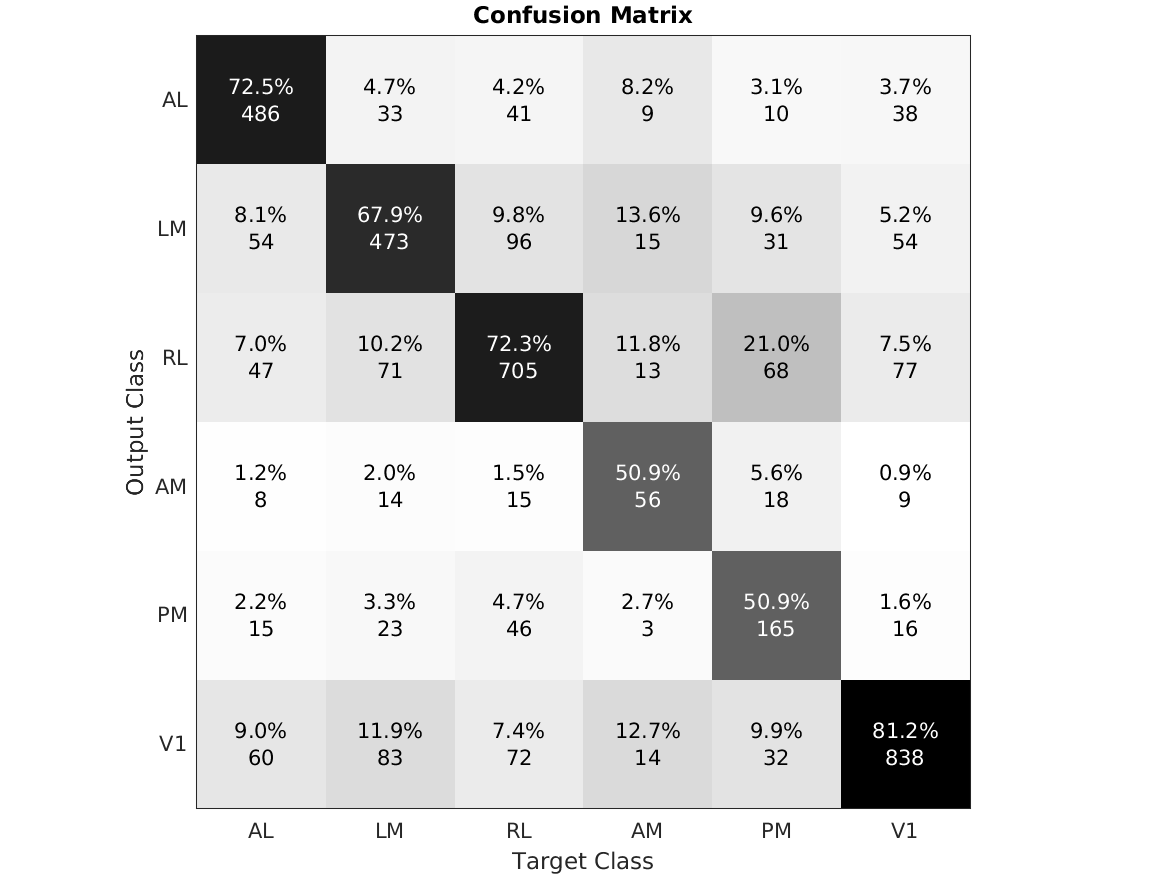

In [4]:
from IPython.display import Image, display

Image(filename=plot_confusion_mat(cre_lines[0], stimuli_set[2], classifiers.GMM), width=500) 

### Step 4: Compare resting state result with stimulus induced responses (Fig 7)¶
- See Section 2.3 of [1] for more detials of below given experiment.


In [5]:

df = pd.DataFrame(columns = ['Trial_Number', 'Accuracy', 'Duration', 'Stimuli'])  


for duration in tqdm(range(10,110,10)):
    for trial in range(3):
        acc = run_subset_supervised_classification(cre_lines[0], stimuli_set[3], classifiers.GMM, float(duration), False)
        df.loc[len(df)] = [trial, acc, duration, 'Resting_State']
        
        acc = run_subset_supervised_classification(cre_lines[0], stimuli_set[2],  classifiers.GMM, float(duration), True)
        df.loc[len(df)] = [trial, acc, duration, stimuli_set[2]+"_Single_Trial"]

        acc = run_subset_supervised_classification(cre_lines[0], stimuli_set[2], classifiers.GMM, float(duration), False)
        df.loc[len(df)] = [trial, acc, duration, stimuli_set[2]+"_Multi_Trial"]
print(df)


   Trial_Number   Accuracy Duration                           Stimuli
0             0  30.682550       10                     Resting_State
1             0  32.773109       10  natural_movie_three_Single_Trial
2             0  36.580882       10   natural_movie_three_Multi_Trial
3             1  31.229878       10                     Resting_State
4             1  32.956933       10  natural_movie_three_Single_Trial
..          ...        ...      ...                               ...
85            1  54.674370      100  natural_movie_three_Single_Trial
86            1  68.513655      100   natural_movie_three_Multi_Trial
87            2  51.899549      100                     Resting_State
88            2  53.965336      100  natural_movie_three_Single_Trial
89            2  67.489496      100   natural_movie_three_Multi_Trial

[90 rows x 4 columns]


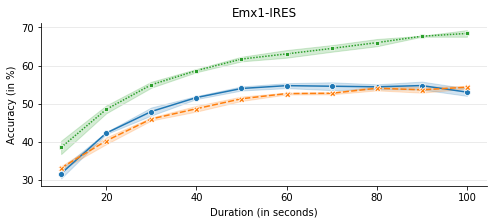

In [6]:
ax = sns.lineplot(x="Duration", y="Accuracy",
             hue="Stimuli",style="Stimuli",markers=True,ci="sd", legend=False,
             data=df)
sns.despine()
ax.set_title("Emx1-IRES")
ax.set_xlabel("Duration (in seconds)")
ax.set_ylabel("Accuracy (in %)")
ax.grid(axis='y', color='0.90')
#x_t = [x*4.5 for x in range(1,13)]
#ax.set_xticks(x_t);
#ax.set_aspect(0.5);
fig = ax.get_figure()
fig.set_size_inches(8, 3)

### Step 5: Compute correlations in reponses from different areas (Fig 8)
- see Section 3 of [1] for more details

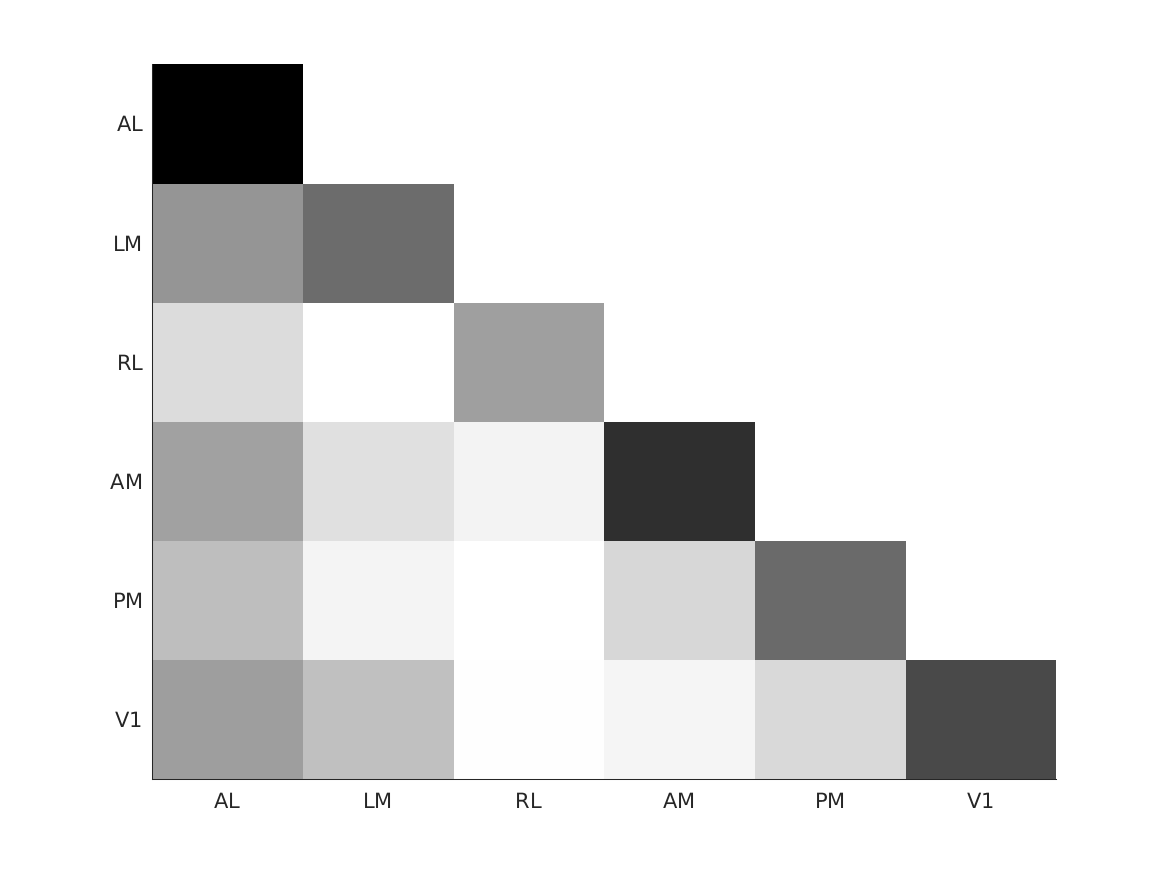

In [7]:
from IPython.display import Image, display

Image(filename=plot_reponse_correlation(cre_lines[0], stimuli_set[2]), width=400) 

### Step 6: 2D representation of Neuronal Responses (Fig 9)
- see Section 3 of [1] for more details

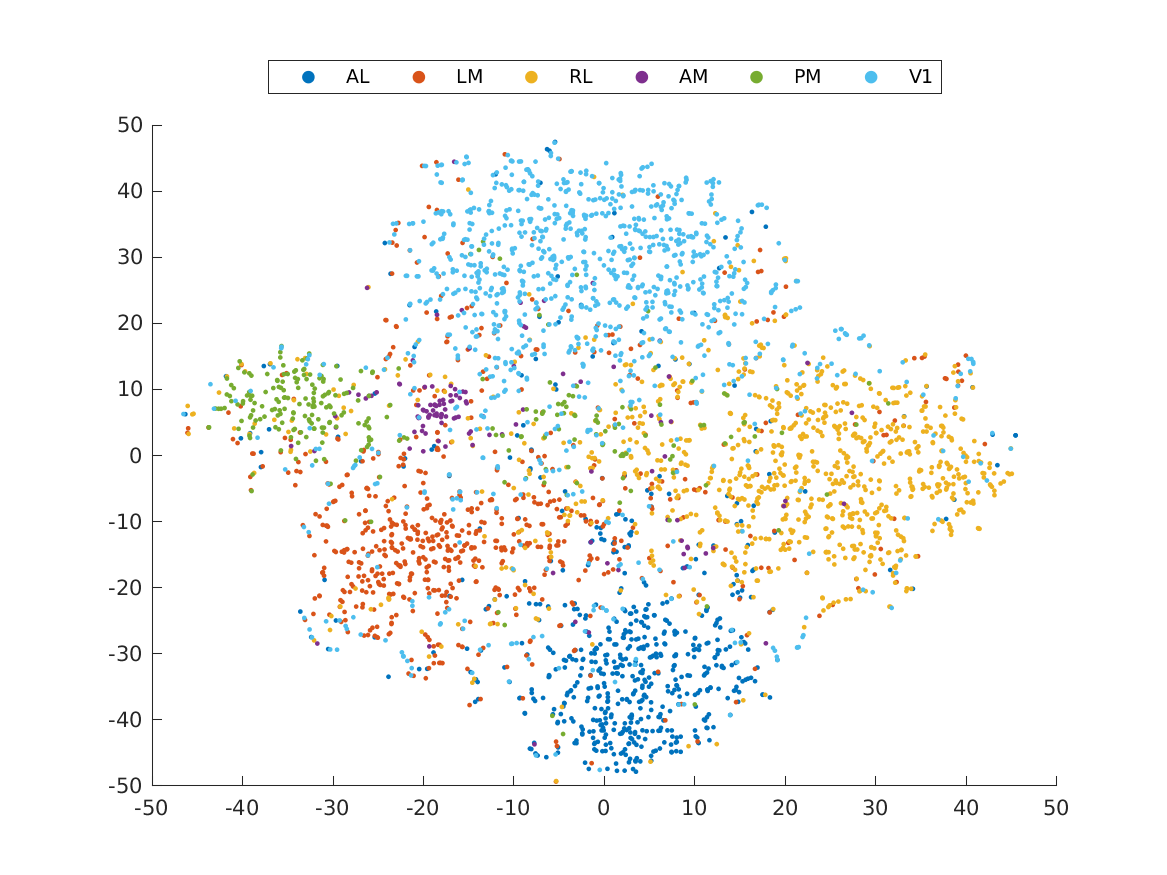

In [8]:
from IPython.display import Image, display

Image(filename=plot_tSNE(cre_lines[0], stimuli_set[2]), width=600) 

### References
[1] Mari Ganesh Kumar, Ming Hu, Aadhirai R, Mriganka Sur, and Hema A Murthy. “’Functional Parcellation of Mouse Visual Cortex Using Statistical Techniques Reveals Response-Dependent Clustering of Cortical Processing Areas”. In: PLOS Computational Biology (2020). Accepted For Publication